In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Glass.csv')

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [7]:
X = df.drop('Type',axis = 1)
y = df['Type']

In [58]:
ss = StandardScaler().set_output(transform='pandas')
a = np.array([[10, 0.7] , [4, 0.9] , [12, 0.7]])
ss.fit(a)


StandardScaler()

In [62]:
ss.mean_

array([8.66666667, 0.76666667])

In [60]:
X.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3,random_state=24,stratify=df['Type'])

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import accuracy_score, f1_score
scores = []
n_neighbour = [1,2,3,4,5,6,7,8,9,10]

import numpy as np

for i in n_neighbour:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test,y_pred))



i_max = np.argmax(scores)
print('Index of Maximun accuracy Score', n_neighbour[i_max])
print('Best accuracy score', scores[i_max])

scores

Index of Maximun accuracy Score 1
Best accuracy score 0.7076923076923077


[0.7076923076923077,
 0.6461538461538462,
 0.6307692307692307,
 0.6307692307692307,
 0.6307692307692307,
 0.6153846153846154,
 0.6,
 0.6,
 0.6153846153846154,
 0.6153846153846154]

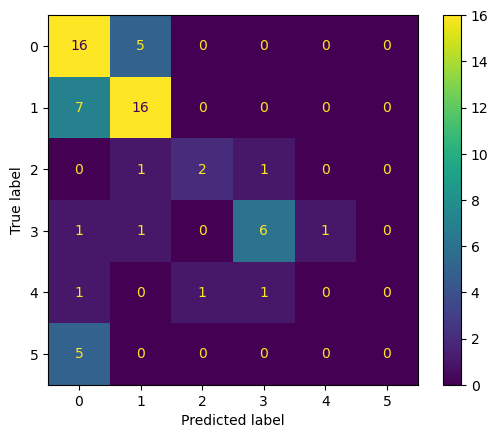

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score,f1_score,classification_report

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


In [46]:
print(classification_report(Y_test,y_pred))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.53      0.76      0.63        21
building_windows_non_float_processed       0.70      0.70      0.70        23
                          containers       0.67      0.50      0.57         4
                           headlamps       0.75      0.67      0.71         9
                           tableware       0.00      0.00      0.00         3
     vehicle_windows_float_processed       0.00      0.00      0.00         5

                            accuracy                           0.62        65
                           macro avg       0.44      0.44      0.43        65
                        weighted avg       0.56      0.62      0.58        65



C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.